# Accessing Azure MySQL Database (mysql.connector)

This example shows the code for accessing a MySQL database on Azure. The host, user, and password used here are temporary.
If this MySQL database is taken down then you need to set up your own:

1. Download ```lahman-mysql-dump.sql``` "2019 – MySQL version " (http://www.seanlahman.com/baseball-archive/statistics)
2. Replace the string ```utf8mb4_0900_ai_ci``` and replaced it with ```utf8mb4_general_ci``` in ```lahman-mysql-dump.sql```
3. Create an Azure Database for MySQL database on your Azure account using appropriate firewall settings for IPs.
4. In MySQL Workbench, connect to your MySql server.
5. In MySQL Workbench -> Server > Data Import > Import from Self-Contained File
6. Select the ```lahman-mysql-dump.sql``` file -> Click Start Import button.
7. Test it out in MySQL Workbench:
    ```
    USE `lahmansbaseballdb`;
    SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
    FROM batting b
        JOIN people p ON p.playerID = b.playerID
        JOIN teams t ON t.ID = b.team_ID
    WHERE b.YearID = 1977
    ORDER BY b.HR DESC
    LIMIT 5;
    ```

![Test MySQL Workbench](img/TestMySQLWorkbench.png)

## Access the Database Using ```mysql-connector-python```

* You need to run ```conda install -c anaconda mysql-connector-python```
* NOTE: The SSL version on the Python client side and the MySQL server side need to match. To avoid this SSL error, in this example, in the call to ```mysql.connect()```, we have ```ssl_disabled=True```, which is not usually suitable for production code. This is done here for simplicity of demonstration only. In production code, SLL should not be disabled like this, but instead, it should be solved by configuring the server and/or client to use the same version of SSL.

In [1]:
import platform
import sys
import ssl

print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))

os:            Windows-10-10.0.18362-SP0
python         3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
openssl:       OpenSSL 1.1.1d  10 Sep 2019
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2


In [2]:
# conda install -c anaconda mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="mysqllahmansbaseball.mysql.database.azure.com", # this server will not remain available in the long term
    user="newuser@mysqllahmansbaseball",                  # this user name will not remain available in the long term
    password="Pa$$w0rd",                                  # this password will not remain available in the long term
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)

In [3]:
cursor = cnx.cursor()
sql = "SELECT * FROM Batting LIMIT 10"
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

(1, 'abercda01', 1871, 1, 'TRO', 8, 'NA', 1, None, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, 0)
(2, 'addybo01', 1871, 1, 'RC1', 7, 'NA', 25, None, 118, 30, 32, 6, 0, 0, 13, 8, 1, 4, 0, None, None, None, None, 0)
(3, 'allisar01', 1871, 1, 'CL1', 3, 'NA', 29, None, 137, 28, 40, 4, 5, 0, 19, 3, 1, 2, 5, None, None, None, None, 1)
(4, 'allisdo01', 1871, 1, 'WS3', 9, 'NA', 27, None, 133, 28, 44, 10, 2, 2, 27, 1, 1, 0, 2, None, None, None, None, 0)
(5, 'ansonca01', 1871, 1, 'RC1', 7, 'NA', 25, None, 120, 29, 39, 11, 3, 0, 16, 6, 2, 2, 1, None, None, None, None, 0)
(6, 'armstbo01', 1871, 1, 'FW1', 4, 'NA', 12, None, 49, 9, 11, 2, 1, 0, 5, 0, 1, 0, 1, None, None, None, None, 0)
(7, 'barkeal01', 1871, 1, 'RC1', 7, 'NA', 1, None, 4, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, None, None, None, None, 0)
(8, 'barnero01', 1871, 1, 'BS1', 1, 'NA', 31, None, 157, 66, 63, 10, 9, 0, 34, 11, 6, 13, 1, None, None, None, None, 1)
(9, 'barrebi01', 1871, 1, 'FW1', 4, 'NA', 1, None, 5, 1, 1, 1, 0, 0, 1, 0, 

In [4]:
sql = """
SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
FROM batting b
    JOIN people p ON p.playerID = b.playerID
    JOIN teams t ON t.ID = b.team_ID
WHERE b.YearID = 1977
ORDER BY b.HR DESC
LIMIT 5;
"""
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

('George', 'Foster', 52, 'Cincinnati Reds', 1977)
('Jeff', 'Burroughs', 41, 'Atlanta Braves', 1977)
('Greg', 'Luzinski', 39, 'Philadelphia Phillies', 1977)
('Jim', 'Rice', 39, 'Boston Red Sox', 1977)
('Mike', 'Schmidt', 38, 'Philadelphia Phillies', 1977)


In [5]:
import pandas as pd

df = pd.DataFrame(results)
df.head()

,0,1,2,3,4
0,George,Foster,52,Cincinnati Reds,1977
1,Jeff,Burroughs,41,Atlanta Braves,1977
2,Greg,Luzinski,39,Philadelphia Phillies,1977
3,Jim,Rice,39,Boston Red Sox,1977
4,Mike,Schmidt,38,Philadelphia Phillies,1977


In [6]:
print(type(cursor.description))
print(type(cursor.description[0]))
print(cursor.description)

<class 'list'>
<class 'tuple'>
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('HR', 2, None, None, None, None, 1, 0), ('team', 253, None, None, None, None, 1, 0), ('yearID', 2, None, None, None, None, 0, 20481)]


In [7]:
from mysql.connector import FieldType

for i in range(len(cursor.description)):
  print("Column {}:".format(i+1))
  desc = cursor.description[i]
  print("  column_name = {}".format(desc[0]))
  print("  type = {} ({})".format(desc[1], FieldType.get_info(desc[1])))
  print("  null_ok = {}".format(desc[6]))
  print("  column_flags = {}".format(desc[7]))

Column 1:
  column_name = nameFirst
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 2:
  column_name = nameLast
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 3:
  column_name = HR
  type = 2 (SHORT)
  null_ok = 1
  column_flags = 0
Column 4:
  column_name = team
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 5:
  column_name = yearID
  type = 2 (SHORT)
  null_ok = 0
  column_flags = 20481


In [8]:
headers = [i[0] for i in cursor.description]
print(headers)

['nameFirst', 'nameLast', 'HR', 'team', 'yearID']


In [9]:
player = list(df[1] + ", " + df[0])
print(player)

['Foster, George', 'Burroughs, Jeff', 'Luzinski, Greg', 'Rice, Jim', 'Schmidt, Mike']


In [10]:
df = pd.DataFrame(results, columns =[headers[0], headers[1], headers[2], headers[3], headers[4]], index=player)
print(df)  

                nameFirst   nameLast  HR                   team  yearID
Foster, George     George     Foster  52        Cincinnati Reds    1977
Burroughs, Jeff      Jeff  Burroughs  41         Atlanta Braves    1977
Luzinski, Greg       Greg   Luzinski  39  Philadelphia Phillies    1977
Rice, Jim             Jim       Rice  39         Boston Red Sox    1977
Schmidt, Mike        Mike    Schmidt  38  Philadelphia Phillies    1977


Text(0.5, 1.0, 'Home Runs')

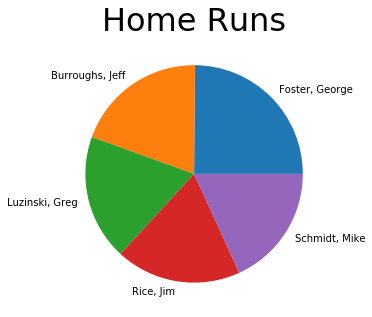

In [11]:
%matplotlib inline

df.plot(
    y="HR", kind='pie', legend=False, label="", figsize=(5, 5)
    ).set_title('Home Runs', fontdict={'fontsize': 32, 'fontweight': 'medium'})

In [12]:
cursor = cnx.cursor()
sql = """
SELECT p.nameFirst, p.nameLast, p.Height, p.Weight, p.throws, p.bats,
p.birthYear, p.birthMonth, p.birthDay,p.birthCountry, b.*
FROM People p
JOIN Batting b ON b.playerID = p.playerID
WHERE yearID between 2014 and 2019 AND b.g >= "50"
ORDER BY b.yearID Desc
LIMIT 25;
"""
cursor.execute(sql)
results = cursor.fetchall()
df_baseball = pd.DataFrame(results)
print(df_baseball)

           0         1   2    3  4  5     6   7   8          9  ...   25  26  \
0        Jose     Abreu  75  255  R  R  1987   1  29       Cuba ...  123   2   
1      Ronald     Acuna  72  180  R  R  1997  12  18  Venezuela ...  101  37   
2       Willy    Adames  72  205  R  R  1995   9   2       D.R. ...   52   4   
3        Matt     Adams  75  245  R  L  1988   8  31        USA ...   56   0   
4       Ehire  Adrianza  73  195  R  B  1989   8  21  Venezuela ...   22   0   
5       Jesus   Aguilar  75  250  R  R  1990   6  30  Venezuela ...   34   0   
6        Nick     Ahmed  74  195  R  R  1990   3  15        USA ...   82   8   
7      Hanser   Alberto  71  215  R  R  1992  10  17       D.R. ...   51   4   
8        Matt    Albers  73  225  R  L  1983   1  20        USA ...    0   0   
9       Ozzie    Albies  68  165  R  B  1997   1   7    Curacao ...   86  15   
10      Jorge    Alfaro  74  225  R  R  1993   6  11   Colombia ...   57   4   
11       Greg     Allen  72  185  R  B  

In [13]:
print(type(cursor.description))
print(type(cursor.description[0]))
print(len(cursor.description))
print(cursor.description)

<class 'list'>
<class 'tuple'>
35
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('Height', 3, None, None, None, None, 1, 0), ('Weight', 3, None, None, None, None, 1, 0), ('throws', 253, None, None, None, None, 1, 0), ('bats', 253, None, None, None, None, 1, 0), ('birthYear', 3, None, None, None, None, 1, 0), ('birthMonth', 3, None, None, None, None, 1, 0), ('birthDay', 3, None, None, None, None, 1, 0), ('birthCountry', 253, None, None, None, None, 1, 0), ('ID', 3, None, None, None, None, 0, 16899), ('playerID', 253, None, None, None, None, 0, 20489), ('yearID', 2, None, None, None, None, 0, 20481), ('stint', 2, None, None, None, None, 0, 20481), ('teamID', 254, None, None, None, None, 1, 0), ('team_ID', 3, None, None, None, None, 1, 16392), ('lgID', 254, None, None, None, None, 1, 16392), ('G', 2, None, None, None, None, 1, 0), ('G_batting', 2, None, None, None, None, 1, 0), ('AB', 2, None, None, None, None, 1, 0), ('R', 2, None, No

In [14]:
headers = [i[0] for i in cursor.description]
print(headers)
print(type(headers))

['nameFirst', 'nameLast', 'Height', 'Weight', 'throws', 'bats', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G', 'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
<class 'list'>


In [15]:
playerName = list(df_baseball[0] + ", " + df_baseball[1])
df_baseball = pd.DataFrame(results, columns = 
    [headers[0],headers[1],headers[2],headers[3],headers[4],headers[5],headers[6],
    headers[7],headers[8],headers[9],headers[10],headers[11],headers[12],
    headers[13],headers[14],headers[15],headers[16],headers[17],headers[18],
    headers[19],headers[20],headers[21],headers[22],headers[23],headers[24],
    headers[25],headers[26],headers[27],headers[28],headers[29],headers[30],
    headers[31],headers[32],headers[33],headers[34]], index=playerName)

print(df_baseball.head())

                nameFirst  nameLast  Height  Weight throws bats  birthYear  \
Jose, Abreu          Jose     Abreu      75     255      R    R       1987   
Ronald, Acuna      Ronald     Acuna      72     180      R    R       1997   
Willy, Adames       Willy    Adames      72     205      R    R       1995   
Matt, Adams          Matt     Adams      75     245      R    L       1988   
Ehire, Adrianza     Ehire  Adrianza      73     195      R    B       1989   

                 birthMonth  birthDay birthCountry  ...   RBI  SB  CS  BB  \
Jose, Abreu               1        29         Cuba  ...   123   2   2  36   
Ronald, Acuna            12        18    Venezuela  ...   101  37   9  76   
Willy, Adames             9         2         D.R.  ...    52   4   2  46   
Matt, Adams               8        31          USA  ...    56   0   0  20   
Ehire, Adrianza           8        21    Venezuela  ...    22   0   2  20   

                  SO  IBB HBP  SH  SF  GIDP  
Jose, Abreu      152  

In [16]:
print(type(df_baseball['birthYear']))
print(type(df_baseball['birthMonth']))
print(type(df_baseball['birthDay']))
print(type(df_baseball['birthYear'][0]))
print(type(df_baseball['birthMonth'][1]))
print(type(df_baseball['birthDay'][2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [17]:
# See: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
birthDays = pd.to_datetime(dict(year=df_baseball.birthYear, month=df_baseball.birthMonth, day=df_baseball.birthDay))
print(birthDays)

Jose, Abreu         1987-01-29
Ronald, Acuna       1997-12-18
Willy, Adames       1995-09-02
Matt, Adams         1988-08-31
Ehire, Adrianza     1989-08-21
Jesus, Aguilar      1990-06-30
Nick, Ahmed         1990-03-15
Hanser, Alberto     1992-10-17
Matt, Albers        1983-01-20
Ozzie, Albies       1997-01-07
Jorge, Alfaro       1993-06-11
Greg, Allen         1993-03-15
Albert, Almora      1994-04-16
Pete, Alonso        1994-12-07
Yonder, Alonso      1987-04-08
Yonder, Alonso      1987-04-08
Jose, Altuve        1990-05-06
Jose, Alvarez       1989-05-06
Yordan, Alvarez     1997-06-27
Brian, Anderson     1993-05-19
Justin, Anderson    1992-09-28
Tim, Anderson       1993-06-23
Matt, Andriese      1989-08-28
Elvis, Andrus       1988-08-26
Aristides, Aquino   1994-04-22
dtype: datetime64[ns]


In [18]:
type(birthDays[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
sql = "SELECT yearID, HR FROM batting"
cursor.execute(sql)
results = cursor.fetchall()
print(results[0])
print(results[-1])

(1871, 0)
(2019, 9)


   year  hr
0  1871   0
1  1871   0
2  1871   0
3  1871   2
4  1871   0
        year  hr
107424  2019   0
107425  2019   0
107426  2019   6
107427  2019   1
107428  2019   9


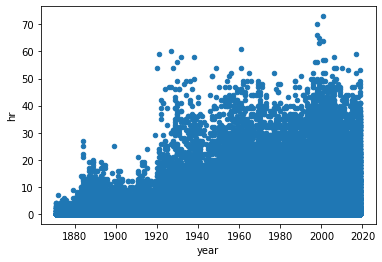

In [20]:
df = pd.DataFrame(results, columns=['year', 'hr'])
print(df.head())
print(df.tail())
df.plot.scatter(x='year', y='hr')